# **Car Price Estimator**

The goal of the problem statement is, given specifications of used cars, we analyse the specifications and use them to predict the price of the car. We will walk you through the following phases for predicting the price:
1. Data understanding
2. Data preprocessing
3. Regression
4. Validation

### **Section 1: Data Understanding**

#### **Importing dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_columns", 150)
pd.set_option("max_rows", 150)

#### **Load the data**

For the first part of this notebook, you'll need the 'vehicles.csv' downloaded, it is present in the data folder. The cell below will load the data from the vehicles.csv dataset into a dataframe

RAW_DATA_PATH - provides the path to the directory that contains the dataset
RAW_DATA - dataframe that contains the loaded data present in the dataset

In [2]:
RAW_DATA_PATH = "./data/vehicles.csv"
RAW_DATA = pd.read_csv(RAW_DATA_PATH)

#### **About the data**

The vehicles.csv file contains data about used trucks and cars within USA collected from craigslist. The dataset can be found on kaggle at the link below:
https://www.kaggle.com/austinreese/craigslist-carstrucks-data#vehicles.csv

The dataset contains 25 columns, here are the columns and what we interpret of them:
1. id: identification number of the vehicle
2. url: the craigslist link to the vehicle
3. region: the part of the country the vehicle belongs to within USA
4. region_url: generic link that points to the region's craiglist
5. price: cost listed for the vehicle
6. year: manufacturing year of the vehicle
7. manufacturer: company that produced the vehicle
8. model: specific type of vehicle produced the manufacturer
9. condition: current state of the vehicle
10. cylinders: number of cylinders
11. fuel: type of fuel
12. odometer: distance travelled by the vehicle
13. title_status: Whether or not the car has been involved in an accident, theft or incurred major damage.
14. transmission: type of transmission system of the vehicle
15. vin: Vehicle Identification Number
16. drive: 4 wheel drive or 2 wheel drive or rear wheel drive
17. size: size of the vehicle
18. type: configuration of the vehicle
19. paint_color: color of the vehicle's body
20. image_url: craiglist link that provides an image for the vehicle
21. description: brief description of the vehicle
22. county: county that the vehicle belongs to
23. state: state that the vehicle belongs to
24. lat: latitude that the vehicle belongs to
25. long: longitude that the vehicle belongs to

In [3]:
RAW_DATA.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
5,7034406582,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,13999,2009.0,ram,NaN,NaN,NaN,gas,120057.0,clean,automatic,1D3HV18P89S777871,4wd,NaN,pickup,silver,https://images.craigslist.org/00y0y_RR9x2lk7eh...,"2009 RAM 1500 4WD Quad Cab 140.5"" ST"" Offe...",NaN,ut,40.3744,-104.694
6,7034405619,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2017.0,ford,f-350,NaN,NaN,diesel,95484.0,clean,automatic,1FT8W3BT2HEE98744,4wd,NaN,pickup,white,https://images.craigslist.org/00k0k_lIBatiU90s...,2017 Ford Super Duty F-350 F350 F 350 SRW Crew...,NaN,ut,40.3744,-104.694
7,7034405349,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,14500,2007.0,gmc,sierra,NaN,NaN,gas,89340.0,clean,automatic,1GTGK13UX7F108498,4wd,NaN,pickup,NaN,https://images.craigslist.org/00202_jTNQzQVWZs...,2007 GMC Sierra 1500 SLE Crew Cab 4WD Offe...,NaN,ut,40.3744,-104.694
8,7034404595,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12500,2013.0,ford,f-250,NaN,NaN,gas,226031.0,clean,automatic,1FT7X2B63DEA44140,4wd,NaN,pickup,white,https://images.craigslist.org/00F0F_99lwfqrZWc...,2013 Ford F-250 F250 F 250 SD XLT 4WD Offe...,NaN,ut,40.3744,-104.694
9,7034401857,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2012.0,ram,NaN,NaN,NaN,diesel,128153.0,clean,automatic,3C6UD5PL2CG168524,4wd,NaN,pickup,silver,https://images.craigslist.org/00a0a_1cDSDtUsLA...,"2012 RAM 2500 4WD Mega Cab 160.5"" Laramie Long...",NaN,ut,40.3744,-104.694


## **Section 2: Data Pre-processing**

We start by analysing the description of all the features. Next, we analyse attributes with missing values and the number of missing values.

In [3]:
RAW_DATA.describe()

,id,price,year,odometer,county,lat,long
count,5.397590e+05,5.397590e+05,538772.000000,4.407830e+05,0.0,530785.000000,530785.000000
mean,7.087609e+09,1.954214e+05,2009.830982,1.008008e+05,NaN,38.432128,-94.040501
std,5.234176e+06,2.208252e+07,9.161334,1.767058e+05,NaN,5.916936,17.626658
min,7.065765e+09,0.000000e+00,0.000000,0.000000e+00,NaN,-84.911400,-176.810000
25%,7.084240e+09,4.400000e+03,2007.000000,4.703850e+04,NaN,34.197100,-106.782000
50%,7.088973e+09,9.500000e+03,2012.000000,9.330000e+04,NaN,39.077600,-88.100900
75%,7.092094e+09,1.792600e+04,2015.000000,1.377550e+05,NaN,42.449100,-81.219000
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07,NaN,84.514800,161.016000


From the above readings, here are our observations:
1. it is clear that we don't need the county attribute as it has no values to offer. We can get rid of the column
2. factors like url, image_url, region_url, vin, description, lat and lon aren't primary factors and can be removed

In [4]:
temp = RAW_DATA.isnull().sum()
percent = ((RAW_DATA.isnull().sum()/RAW_DATA.count())*100)
missing_data = pd.concat([temp,percent],axis=1,keys=['Total','percent'],sort=True)
missing_data

,Total,percent
condition,236052,77.723595
county,539759,inf
cylinders,218495,68.011044
description,21,0.003891
drive,155772,40.566998
fuel,3393,0.632590
id,0,0.000000
image_url,19,0.003520
lat,8974,1.690703
long,8974,1.690703


In [5]:
DF_BASIC = RAW_DATA[['price','manufacturer','condition','cylinders', 'model', 'size',
                    'fuel','odometer','transmission','drive','type', 'paint_color', 'year']]

In [6]:
DF_BASIC.tail()

,price,manufacturer,condition,cylinders,model,size,fuel,odometer,transmission,drive,type,paint_color,year
539754,7950,rover,excellent,8 cylinders,NaN,NaN,gas,NaN,automatic,4wd,NaN,NaN,2008.0
539755,13995,nissan,NaN,NaN,frontier,NaN,gas,97545.0,automatic,4wd,pickup,silver,2016.0
539756,10995,bmw,NaN,NaN,335i,compact,gas,80328.0,automatic,NaN,coupe,black,2010.0
539757,6495,dodge,NaN,NaN,dart,NaN,other,83521.0,manual,fwd,sedan,red,2015.0
539758,8990,gmc,NaN,NaN,acadia,NaN,gas,168000.0,automatic,NaN,SUV,white,2008.0


Getting rid of prices above 12000 and less than

In [7]:
DF_BASIC = DF_BASIC.dropna()

In [8]:
DF_BASIC.shape

(106366, 13)

In [9]:
DF_BASIC = DF_BASIC.drop_duplicates()
DF_BASIC = DF_BASIC[(DF_BASIC.year > 1995) ]
DF_BASIC = DF_BASIC[(DF_BASIC.year < 2021) ]
DF_BASIC=DF_BASIC.round({'year':0,'odometer':0})
DF_BASIC=DF_BASIC[(DF_BASIC.price > 100) & (DF_BASIC.price < 125000) ]
DF_BASIC.drop(DF_BASIC.query('price<1000').query('year>2015').query('year<2020').index , inplace=True)

DF_BASIC=DF_BASIC.reset_index(drop=True)

In [11]:
DF_BASIC = DF_BASIC.rename(columns={'type': 'vtype'})

In [13]:
manufacturer_dict = {
    'volkswagen': 0,
    'honda': 1,
    'ford': 2,
    'nissan': 3,
    'jeep': 4,
    'gmc': 5,
    'hyundai': 6,
    'chevrolet': 7,
    'toyota': 8,
    'lexus': 9,
    'ram': 10,
    'dodge': 11,
    'mini': 12,
    'audi': 13,
    'lincoln': 14,
    'mazda': 15,
    'mercedes-benz': 16,
    'acura': 17,
    'subaru': 18,
    'bmw': 19,
    'cadillac': 20,
    'volvo': 21,
    'buick': 22,
    'saturn': 23,
    'kia': 24,
    'rover': 25,
    'infiniti': 26,
    'mitsubishi': 27,
    'chrysler': 28,
    'jaguar': 29,
    'mercury': 30,
    'pontiac': 31,
    'harley-davidson': 32,
    'tesla': 33,
    'fiat': 34,
    'land rover': 35,
    'aston-martin': 36,
    'ferrari': 37,
    'alfa-romeo': 38,
    'porche': 39,
    'hennessey': 40
}

condition_dict = {
    'excellent': 0,
    'good': 1,
    'like new': 2,
    'fair': 3,
    'new': 4,
    'salvage': 5
}

size_dict = {
    'compact' : 0,
    'mid-size' : 1,
    'full-size' : 2,
    'sub-compact' : 3
}

cylinders_dict = {
    '4 cylinders': 4,
    '10 cylinders': 10,
    '6 cylinders': 6,
    '8 cylinders': 8,
    '5 cylinders': 5,
    '3 cylinders': 3,
    '12 cylinders': 12,
    'other': 0
}

fuel_dict = {
    'gas': 0,
    'other': 1,
    'diesel': 2,
    'hybrid': 3,
    'electric': 4,
}

transmission_dict = {
    'manual' : 0,
    'automatic' : 1,
    'electric': 2,
    'other' : 0
}

drive_dict = {
    '4wd' : 4,
    'fwd' : 1,
    'rwd' : 0
}

type_dict = {
    'hatchback' : 1,
    'sedan' : 2,
    'truck' : 3,
    'coupe' : 4,
    'SUV' : 5,
    'pickup' : 6,
    'wagon' : 7,
    'convertible' : 8,
    'van' : 9,
    'other' : 10,
    'mini-van' : 11,
    'bus' : 12,
    'offroad': 13
}

paint_color_dict = {
    'black' : 0,
    'grey' : 1,
    'white' : 2,
    'blue' : 3,
    'custom' : 4,
    'yellow' : 5,
    'silver' : 6,
    'red' : 7,
    'brown' : 8,
    'green' : 9,
    'purple': 10,
    'orange': 11
}

In [14]:
models = list(DF_BASIC['model'])
models_dict = {}
for i in range(len(models)):
    models_dict[models[i]] = i

In [15]:
DF_BASIC['manufacturer'] = [manufacturer_dict[x] for x in DF_BASIC['manufacturer']]
DF_BASIC['condition'] = [condition_dict[x] for x in DF_BASIC['condition']]
DF_BASIC['cylinders'] = [cylinders_dict[x] for x in DF_BASIC['cylinders']]
DF_BASIC['fuel'] = [fuel_dict[x] for x in DF_BASIC['fuel']]
DF_BASIC['transmission'] = [transmission_dict[x] for x in DF_BASIC['transmission']]
DF_BASIC['size'] = [size_dict[x] for x in DF_BASIC['size']]
DF_BASIC['vtype'] = [type_dict[x] for x in DF_BASIC['vtype']]
DF_BASIC['paint_color'] = [paint_color_dict[x] for x in DF_BASIC['paint_color']]
DF_BASIC['drive'] = [drive_dict[x] for x in DF_BASIC['drive']]
DF_BASIC['model'] = [models_dict[x] for x in DF_BASIC['model']]

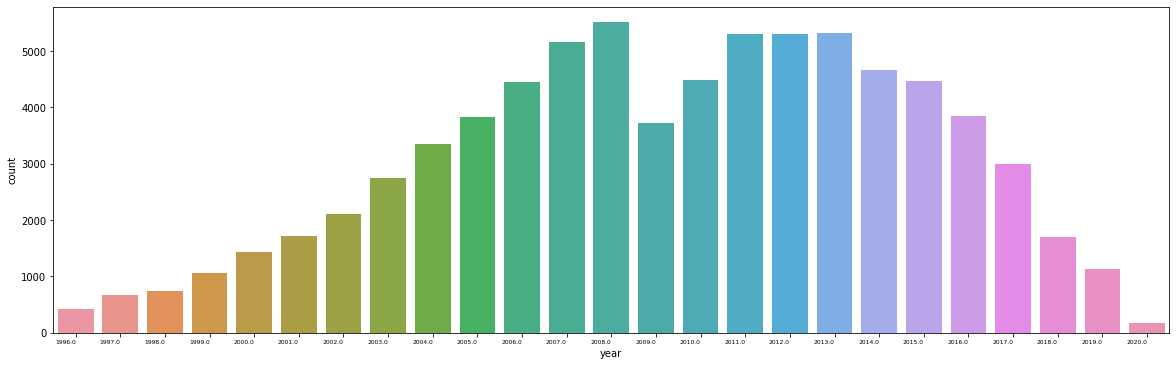

In [14]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='year',data=DF_BASIC);
ax.set_xticklabels(ax.get_xticklabels(), ha="right",fontsize=6);

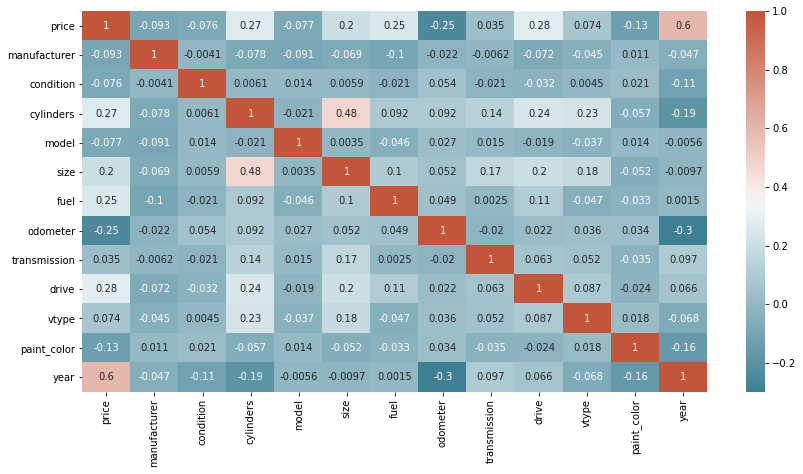

In [17]:
plt.figure(figsize=(14,7))
correlation = DF_BASIC.corr()
# plot the heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True));

Text(0.5, 1.0, 'Car manufacturer vs average price')

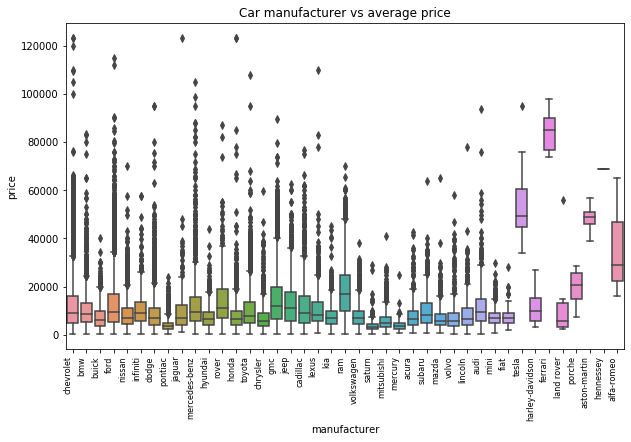

In [13]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='manufacturer', y='price', data=DF_BASIC);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Car manufacturer vs average price");

In [18]:
DF_BASIC = pd.get_dummies(DF_BASIC)
DF_BASIC.isnull().sum()

price           0
manufacturer    0
condition       0
cylinders       0
model           0
size            0
fuel            0
odometer        0
transmission    0
drive           0
vtype           0
paint_color     0
year            0
dtype: int64

In [19]:
DF_BASIC.head()

,price,manufacturer,condition,cylinders,model,size,fuel,odometer,transmission,drive,vtype,paint_color,year
0,17899,0,0,4,56065,0,0,63500.0,0,4,1,0,2012.0
1,4600,1,1,4,75697,1,0,110982.0,1,1,2,1,2008.0
2,28000,2,1,10,2,2,0,67348.0,1,4,3,2,2004.0
3,2500,2,1,6,75430,2,0,129000.0,0,0,4,3,2004.0
4,12000,0,2,4,75427,2,0,65000.0,1,1,2,2,2015.0


## **Section 3: Perform Regression**

We start by preparing the cleaned data to make it fit for training. We first define our X (input variables) and y (outcomes). We then use the train_test_split package from scikit learn to split the data into train and test samples (80:20) resulting in X_train, X_test, Y_train, Y_test.

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [21]:
X = DF_BASIC.drop(columns='price')[:2000]
y = DF_BASIC['price'][:2000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
gb = GradientBoostingRegressor(random_state=21, n_estimators=400)
rf = RandomForestRegressor(n_estimators=1000, max_depth=25, random_state=25)
lr = LinearRegression()

In [24]:
gb.fit(X_train, y_train);
lr.fit(X_train, y_train);
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=25, verbose=0, warm_start=False)

## **Section 4: Evaluating the model**

For evaluating the model, we use the r2 score to judge whether our model is performing to it's best or not. The closer the r2 value is to 1, the lesser the error is. 

In [25]:
r2_score_gb = r2_score(y_test, gb.predict(X_test))
r2_score_lr = r2_score(y_test, lr.predict(X_test))
r2_score_rf = r2_score(y_test, rf.predict(X_test))

print("R2: %.4f" % r2_score_gb)
print("R2: %.4f" % r2_score_lr)
print("R2: %.4f" % r2_score_rf)

R2: 0.8439
R2: 0.6310
R2: 0.8110


In [26]:
prediction = gb.predict(X.loc[30].values.reshape(1, -1))
prediction[0]

15425.224026868684

## **Section 5: Saving the model**

We save our model as a joblib file. This joblib file may be imported anytime to be implemented in a service.

In [27]:
from joblib import dump, load

In [28]:
dump(lr, 'model/lr.joblib')
dump(gb, 'model/gb.joblib')
dump(rf, 'model/rf.joblib')

['model/rf.joblib']